In [16]:
# RFM ile Müşteri Segmentasyonu (Customer Segmentation with RFM)
# İş Problemi (Business Problem)
###############################################################
# FLO müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor.
# Buna yönelik olarak müşterilerin davranışları tanımlanacak ve bu davranış öbeklenmelerine göre gruplar oluşturulacak..
###############################################################
# Veri Seti Hikayesi
###############################################################

# Veri seti son alışverişlerini 2020 - 2021 yıllarında OmniChannel(hem online hem offline alışveriş yapan) olarak yapan müşterilerin geçmiş alışveriş davranışlarından
# elde edilen bilgilerden oluşmaktadır.

# master_id: Eşsiz müşteri numarası
# order_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile, Offline)
# last_order_channel : En son alışverişin yapıldığı kanal
# first_order_date : Müşterinin yaptığı ilk alışveriş tarihi
# last_order_date : Müşterinin yaptığı son alışveriş tarihi
# last_order_date_online : Muşterinin online platformda yaptığı son alışveriş tarihi
# last_order_date_offline : Muşterinin offline platformda yaptığı son alışveriş tarihi
# order_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı
# order_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı
# customer_value_total_ever_offline : Müşterinin offline alışverişlerinde ödediği toplam ücret
# customer_value_total_ever_online : Müşterinin online alışverişlerinde ödediği toplam ücret
# interested_in_categories_12 : Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi

In [17]:
import pandas as pd
import datetime as dt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [18]:
df_ = pd.read_csv("flo_data_20k.csv")
df = df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.00,3.11,4.23,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.00,1.91,2.06,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.00,253.92,301.53,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.00,497.32,832.60,12.99,149.98,286.46,578.44,45220.13


In [21]:
#Her bir müşterinin toplam alışveriş sayısı ve harcaması
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00,1.00,139.99,799.38,[KADIN],5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00,2.00,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00,2.00,189.97,395.35,"[ERKEK, KADIN]",5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00,1.00,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00,1.00,49.99,159.99,[AKTIFSPOR],2.00,209.98


In [22]:
#Tarih belirten değişkenlerin tipini date yapma
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [23]:
#Alışveriş kanalına göre müşteri sayısı, sipariş sayısı ve toplam harcamanın dağılımı.
df.groupby("order_channel").agg({"master_id":"count",
                                 "order_num_total":"sum",
                                 "customer_value_total":"sum"})

,master_id,order_num_total,customer_value_total
order_channel,,,
Android App,9495,52269.00,7819062.76
Desktop,2735,10920.00,1610321.46
Ios App,2833,15351.00,2525999.93
Mobile,4882,21679.00,3028183.16


In [24]:
#En fazla kazancı getiren ilk 10 müşteri
df.sort_values("customer_value_total", ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.00,1.00,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.00,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.00,1.00,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.00,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.00,3.00,18119.14,2587.20,[AKTIFSPOR],4.00,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.00,1.00,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.00,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.00,2.00,64.97,12038.18,"[ERKEK, KADIN]",20.00,12103.15


In [25]:
#En fazla sipariş veren 10 müşteri
df.sort_values("order_num_total", ascending=False)[:10]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.00,109.00,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.00,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.00,87.00,8432.25,139.98,[ERKEK],88.00,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.00,81.00,3997.55,242.81,[ERKEK],83.00,4240.36
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.00,74.00,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.00,5184.05
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.00,3.00,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.00,5297.88
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.00,1.00,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.00,16918.57
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.00,4.00,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.00,18443.57


#RFM Metrikleri Hesaplama

In [26]:
# Veri setindeki en son alışverişin yapıldığı tarihten 2 gün sonrasını analiz 
df["last_order_date"].max() 

Timestamp('2021-05-30 00:00:00')

In [27]:
analysis_date = dt.datetime(2021,6,1)

In [28]:
rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm["recency"] = (analysis_date - df["last_order_date"]).astype('timedelta64[D]')
rfm["frequency"] = df["order_num_total"]
rfm["monetary"] = df["customer_value_total"]

rfm.head()

,customer_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98


#RF ve RFM Skorlarının Hesaplanması

In [29]:
#  Recency, Frequency ve Monetary metriklerini qcut yardımı ile 1-5 arasında skorlara çevrilmesi ve
# Bu skorları recency_score, frequency_score ve monetary_score olarak kaydedilmesi
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37,3,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55,3,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32,2,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97,3,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98,3,1,1


In [30]:
# recency_score ve frequency_score’u tek bir değişken olarak ifade edilmesi ve RF_SCORE olarak kaydedilmesi
rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37,3,4,4,34
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55,3,5,5,35
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32,2,4,3,24
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97,3,1,1,31
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98,3,1,1,31


In [31]:
# 3. recency_score ve frequency_score ve monetary_score'u tek bir değişken olarak ifade edilmesi ve RFM_SCORE olarak kaydedilmesi
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RFM_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37,3,4,4,34,344
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55,3,5,5,35,355
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32,2,4,3,24,243
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97,3,1,1,31,311
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98,3,1,1,31,311


# GÖREV 4: RF Skorlarının Segment Olarak Tanımlanması


In [32]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RFM_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95.00,5.00,939.37,3,4,4,34,344,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105.00,21.00,2013.55,3,5,5,35,355,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186.00,5.00,585.32,2,4,3,24,243,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135.00,2.00,121.97,3,1,1,31,311,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86.00,2.00,209.98,3,1,1,31,311,about_to_sleep


In [33]:
# 1. Segmentlerin recency, frequnecy ve monetary ortalamalarını inceleyiniz.
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["min","mean","max","count"])

recency                     frequency                     \
                        min   mean    max count       min  mean    max count   
segment                                                                        
about_to_sleep        84.00 113.79 145.00  1629      2.00  2.40   3.00  1629   
at_Risk              146.00 241.61 367.00  3131      3.00  4.47   7.00  3131   
cant_loose           146.00 235.44 367.00  1200      7.00 10.70 111.00  1200   
champions              2.00  17.11  33.00  1932      4.00  8.93 202.00  1932   
hibernating          146.00 247.95 367.00  3604      2.00  2.39   3.00  3604   
loyal_customers       34.00  82.59 145.00  3361      4.00  8.37  83.00  3361   
need_attention        84.00 113.83 145.00   823      3.00  3.73   4.00   823   
new_customers          2.00  17.92  33.00   680      2.00  2.00   2.00   680   
potential_loyalists    2.00  37.16  83.00  2938      2.00  3.30   4.00  2938   
promising             34.00  58.92  83.00   647      2.00  2.00   2.00   647   

                    monetary                         
                         min    mean      max count  
segment                                              
about_to_sleep         49.98  359.01  1607.45  1629  
at_Risk                80.97  646.61  3615.67  3131  
cant_loose            274.42 1474.47 12103.15  1200  
champions             250.34 1406.63 45905.10  1932  
hibernating            44.98  366.27  2533.04  3604  
loyal_customers       183.12 1216.82 36818.29  3361  
need_attention         80.86  562.14  4361.44   823  
new_customers          69.98  339.96  1725.38   680  
potential_loyalists    65.91  533.18 20706.34  2938  
promising              44.98  335.67  1671.75   647

# 2. RFM analizi yardımı ile 2 case için ilgili profildeki müşterilerin bulunması


In [35]:
# a. FLO bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri tercihlerinin üstünde. Bu nedenle markanın
# tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak iletişime geçeilmek isteniliyor. Bu müşterilerin sadık  ve
# kadın kategorisinden alışveriş yapan kişiler olması planlandı. 

target_segments_customer_ids = rfm[rfm["segment"].isin(["champions","loyal_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) & (df["interested_in_categories_12"].str.contains("KADIN"))]["master_id"]
cust_ids

0        cc294636-19f0-11eb-8d74-000d3a38a36f
1        f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8        cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11       c2e15af2-9eed-11e9-9897-000d3a38a36f
33       fb840306-1219-11ea-a001-000d3a38a36f
                         ...                 
19912    f63aba0e-41d8-11ea-96d9-000d3a38a36f
19913    81d0da04-a53e-11e9-a2fc-000d3a38a36f
19914    825e6b00-ab40-11e9-a2fc-000d3a38a36f
19917    f8c471c8-2596-11eb-81e9-000d3a38a36f
19926    7e1c15be-6298-11ea-9861-000d3a38a36f
Name: master_id, Length: 2497, dtype: object

In [37]:
#b. Erkek ve Çoçuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşterilerden olan ama uzun süredir
# alışveriş yapmayan ve yeni gelen müşteriler özel olarak hedef alınmak isteniliyor.
target_segments_customer_ids = rfm[rfm["segment"].isin(["cant_loose","new_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) & ((df["interested_in_categories_12"].str.contains("ERKEK"))|(df["interested_in_categories_12"].str.contains("COCUK")))]["master_id"]
cust_ids

15       13ed97a4-b167-11e9-89fa-000d3a38a36f
76       7d58deb6-62fa-11ea-a6dc-000d3a38a36f
91       808005da-a511-11e9-a2fc-000d3a38a36f
147      90e0b158-2b54-11ea-9d27-000d3a38a36f
166      9613613c-c9d0-11ea-a31e-000d3a38a36f
                         ...                 
19868    6a138f62-d71e-11e9-93bc-000d3a38a36f
19888    36c10134-9ea3-11e9-9897-000d3a38a36f
19932    13a5e98c-a824-11e9-a2fc-000d3a38a36f
19933    6d285c64-5e73-11ea-be5b-000d3a38a36f
19936    1982ac0e-9f4c-11e9-9897-000d3a38a36f
Name: master_id, Length: 994, dtype: object

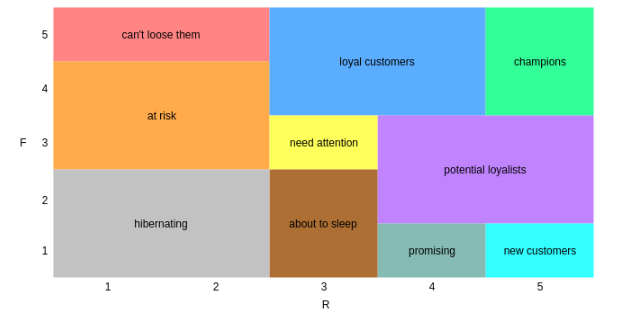